# Bank marketing prediction

In [55]:
import pandas as pd
import numpy as np
df = pd.read_csv('bank-marketing.csv')
df

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,60000,married,tertiary,yes,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,55000,divorced,primary,yes,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,55000,married,secondary,yes,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,20000,married,secondary,yes,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [56]:
df.pdays.describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [57]:
print('median :',df.pdays.median())
print('null_values :',df.pdays.isnull().sum())

median : -1.0
null_values : 0


<function matplotlib.pyplot.show(close=None, block=None)>

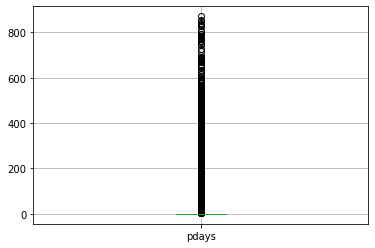

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
df.boxplot(column='pdays')
plt.show

In [59]:
# There are lot of outliers in pdays column

In [60]:
#there are fishy values in pdays column.
#as there are outliers in pdays column so we prform z score test
from scipy import stats 
import numpy as np
z = np.abs(stats.zscore(df['pdays']))
print(z)
print(np.where(z>3))

[0.41145311 0.41145311 0.41145311 ... 1.43618859 0.41145311 1.4761376 ]
(array([32111, 32147, 32230, ..., 45177, 45188, 45199], dtype=int64),)


In [61]:
#now keep only relevant values 
df = df[(z<3)]

In [62]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,45201,45202,45203,45204,45205,45206,45207,45208,45209,45210
age,58,44,33,47,33,35,28,42,58,43,...,53,34,23,73,25,51,71,72,57,37
job,management,technician,entrepreneur,blue-collar,unknown,management,management,entrepreneur,retired,technician,...,management,admin.,student,retired,technician,technician,retired,retired,blue-collar,entrepreneur
salary,100000,60000,120000,20000,0,100000,100000,120000,55000,60000,...,100000,50000,4000,55000,60000,60000,55000,55000,20000,120000
marital,married,single,married,married,single,married,single,divorced,married,single,...,married,single,single,married,single,married,divorced,married,married,married
education,tertiary,secondary,secondary,unknown,unknown,tertiary,tertiary,tertiary,primary,secondary,...,tertiary,secondary,tertiary,secondary,secondary,tertiary,primary,secondary,secondary,secondary
targeted,yes,yes,yes,no,no,yes,no,no,yes,yes,...,yes,yes,no,yes,yes,yes,yes,yes,yes,yes
default,no,no,no,no,no,no,no,yes,no,no,...,no,no,no,no,no,no,no,no,no,no
balance,2143,29,2,1506,1,231,447,2,121,593,...,583,557,113,2850,505,825,1729,5715,668,2971
housing,yes,yes,yes,yes,no,yes,yes,yes,yes,yes,...,no,no,no,no,no,no,no,no,no,no
loan,no,no,yes,no,no,no,yes,no,no,no,...,no,no,no,no,yes,no,no,no,no,no


In [63]:
print('Median:',df.pdays.median())
df.pdays.describe()


Median: -1.0


count    43488.000000
mean        26.638797
std         73.270742
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        340.000000
Name: pdays, dtype: float64

In [64]:
#The mean is reduced from 40 to 26 and median is same

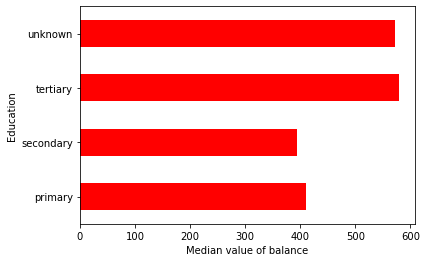

In [65]:
"""horizontal bar graph with the median values of balance for each education level value"""
df.groupby(['education'])['balance'].median().plot.barh(color="red")
plt.xlabel('Median value of balance')
plt.ylabel('Education')
plt.show()

In [66]:
#Median value of balance for tertiary education is maximum

In [67]:
"Inspecting the Data"
df.shape

(43488, 19)

In [68]:
#Checking for null values
df.isnull().sum()

age          0
job          0
salary       0
marital      0
education    0
targeted     0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
dtype: int64

In [69]:
df.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,43488.000000,43488.000000,43488.000000,43488.000000,43488.000000,43488.000000,43488.000000,43488.000000
mean,41.018051,57222.475166,1375.997034,15.921450,258.637256,2.786309,26.638797,0.494665
std,10.650560,32096.579482,3065.244393,8.392264,258.263740,3.138208,73.270742,2.205802
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,454.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,49.000000,70000.000000,1448.000000,22.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,340.000000,275.000000


In [70]:
#To get rid of warnings 
import warnings 
warnings.filterwarnings('ignore')

In [71]:
#Replacing column values from yes and no to binary form 1 and 0
df.replace({'no':0,'yes':1}, inplace = True)
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,1,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,60000,single,secondary,1,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,120000,married,secondary,1,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,20000,married,unknown,0,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,0,single,unknown,0,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


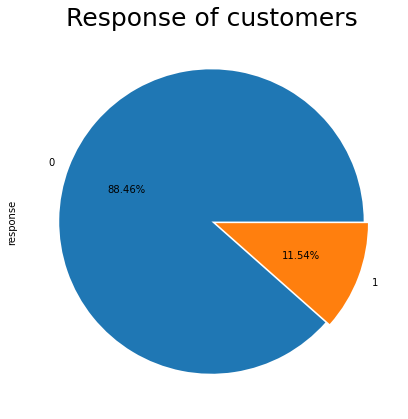

In [72]:
#Response 
plt.figure(figsize=(12,7))
plt.title('Response of customers',fontsize=25)

df.response.value_counts().plot.pie(explode=[0,0.03],autopct='%1.2f%%')
shadow=True

plt.show()

In [73]:
df.response.value_counts()

0    38471
1     5017
Name: response, dtype: int64

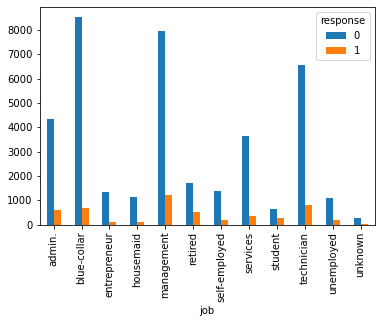

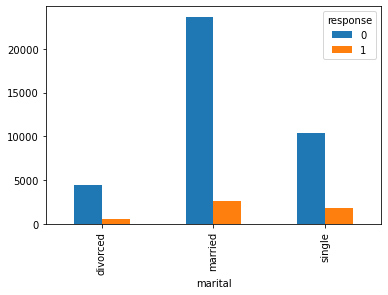

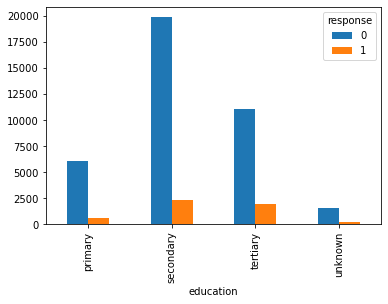

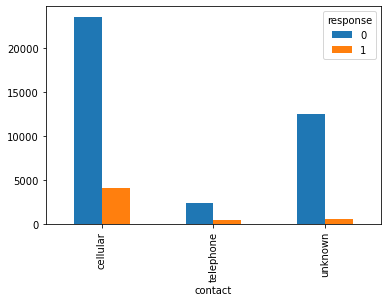

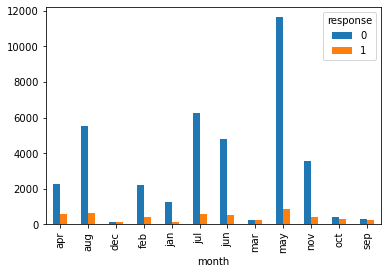

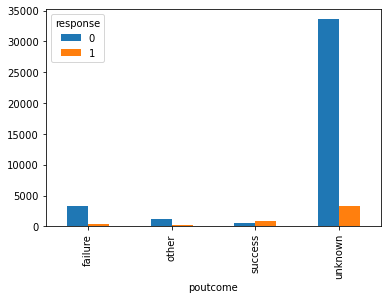

In [74]:
#Printing graphs for all the catagorical values
#We can get the relation information of all the catagorical columns with response
cat = [i for i in df.columns if df[i].dtypes == 'object']
for col in cat:
    pd.crosstab(df[col], df['response']).plot(kind='bar')
   

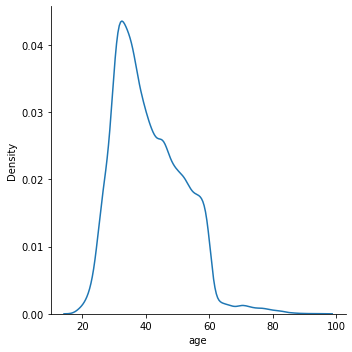

In [75]:
#Age distribution of the data
sns.displot(data=df,x='age',kind='kde')
plt.show()

In [76]:
#most of the users/clients are within age 30-45 and few above 60

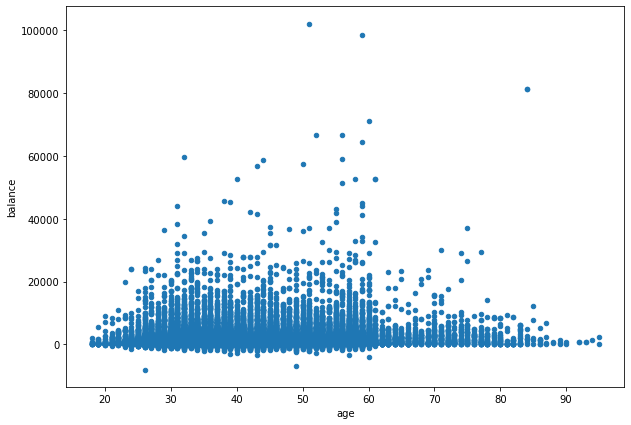

In [77]:
#Relationship between age and balance
age_balance=df.plot.scatter('age','balance',figsize=(10,7))

In [78]:
#Increase in age leads to decrease in balance after 60

In [79]:
#Continuing inspection of pdays column
df['pdays'].value_counts()

-1      36954
 182      167
 92       147
 183      126
 91       126
        ...  
 218        1
 3          1
 25         1
 30         1
 32         1
Name: pdays, Length: 338, dtype: int64

In [80]:
#pdays = -1 means the person is not cotacted before so dropping column pdays 
#so we make new column  
df['pdays_notcontacted']= (df['pdays']== -1 )*1


In [81]:
df 

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,pdays_notcontacted
0,58,management,100000,married,tertiary,1,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0,1
1,44,technician,60000,single,secondary,1,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0,1
2,33,entrepreneur,120000,married,secondary,1,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0,1
3,47,blue-collar,20000,married,unknown,0,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0,1
4,33,unknown,0,single,unknown,0,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,60000,married,tertiary,1,0,825,0,0,cellular,17,nov,977,3,-1,0,unknown,1,1
45207,71,retired,55000,divorced,primary,1,0,1729,0,0,cellular,17,nov,456,2,-1,0,unknown,1,1
45208,72,retired,55000,married,secondary,1,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,1,0
45209,57,blue-collar,20000,married,secondary,1,0,668,0,0,telephone,17,nov,508,4,-1,0,unknown,0,1


In [82]:
#Checking pvalue for all the numerical data
column_names = ['age','salary','targeted','default','balance','housing','loan','day','duration','campaign','pdays','previous','pdays_notcontacted']
target_name = 'response'
x = df[column_names].values
y = df[target_name].values

In [83]:
import statsmodels.api as sm
mod = sm.OLS(y,x)
fit = mod.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.294
Model:                            OLS   Adj. R-squared (uncentered):              0.294
Method:                 Least Squares   F-statistic:                              1394.
Date:                Sun, 20 Jun 2021   Prob (F-statistic):                        0.00
Time:                        22:34:58   Log-Likelihood:                         -7169.1
No. Observations:               43488   AIC:                                  1.436e+04
Df Residuals:                   43475   BIC:                                  1.448e+04
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0019      0.000     15.884      0.000       0.002       0.002
x2          3.584e-07   4.23e-08      8.473      0.000    2.75e-07    4.41e-07
x3            -0.0112      0.004     -3.087      0.002      -0.018      -0.004
x4            -0.0132      0.010     -1.289      0.197      -0.033       0.007
x5          2.678e-06   4.52e-07      5.919      0.000    1.79e-06    3.56e-06
x6            -0.0713      0.003    -25.283      0.000      -0.077      -0.066
x7            -0.0395      0.004    -10.521      0.000      -0.047      -0.032
x8             0.0008      0.000      5.008      0.000       0.000       0.001
x9             0.0005   5.27e-06     95.908      0.000       0.000       0.001
x10           -0.0017      0.000     -3.791      0.000      -0.003      -0.001
x11         4.707e-05   3.19e-05      1.473      0.141   -1.55e-05       0.000
x12            0.0054      0.001      7.458      0.000       0.004       0.007
x13           -0.0926      0.006    -15.290      0.000      -0.105      -0.081
==============================================================================
Omnibus:                    14112.110   Durbin-Watson:                   1.619
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            44645.589
Skew:                           1.680   Prob(JB):                         0.00
Kurtosis:                       6.653   Cond. No.                     4.93e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.93e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [84]:
#p value test is not significant for default(x4) and pdays(x11) so dropping those columns
df = df.drop(['default','pdays'], axis=1)

Label encoding for categorial variables

In [85]:
cat=df.select_dtypes(include=['object']).columns

In [86]:
cat

Index(['job', 'marital', 'education', 'contact', 'month', 'poutcome'], dtype='object')

In [87]:
from sklearn.preprocessing import LabelEncoder

In [88]:
lb=LabelEncoder()
df.job=lb.fit_transform(df["job"])
df.marital=lb.fit_transform(df["marital"])
df.education=lb.fit_transform(df["education"])
df.contact=lb.fit_transform(df["contact"])
df.month=lb.fit_transform(df["month"])
df.poutcome=lb.fit_transform(df["poutcome"])


In [89]:
df

,age,job,salary,marital,education,targeted,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,response,pdays_notcontacted
0,58,4,100000,1,2,1,2143,1,0,2,5,8,261,1,0,3,0,1
1,44,9,60000,2,1,1,29,1,0,2,5,8,151,1,0,3,0,1
2,33,2,120000,1,1,1,2,1,1,2,5,8,76,1,0,3,0,1
3,47,1,20000,1,3,0,1506,1,0,2,5,8,92,1,0,3,0,1
4,33,11,0,2,3,0,1,0,0,2,5,8,198,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,60000,1,2,1,825,0,0,0,17,9,977,3,0,3,1,1
45207,71,5,55000,0,0,1,1729,0,0,0,17,9,456,2,0,3,1,1
45208,72,5,55000,1,1,1,5715,0,0,0,17,9,1127,5,3,2,1,0
45209,57,1,20000,1,1,1,668,0,0,1,17,9,508,4,0,3,0,1


# Making Logistic Regression Model 

In [108]:
from sklearn.model_selection import train_test_split
x = df.loc[:,df.columns!='response']
y = df.loc[:,df.columns=='response']

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0)

In [109]:
print('Length of x_train :', len(x_train), '\nLength of y_train :',len(y_train))
print('Length of x_test :', len(x_test), '\nLength of y_test :',len(y_test))

Length of x_train : 32616 
Length of y_train : 32616
Length of x_test : 10872 
Length of y_test : 10872


In [92]:
# Normalising data using sklearn standardscaler 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [93]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model=lr.fit(x_train,y_train)
print('Train Accuracy is:', model.score(x_train,y_train))
print('Test Accuracy is:', model.score(x_test,y_test))

Train Accuracy is: 0.9013980868285504
Test Accuracy is: 0.9036975717439294


In [94]:
from sklearn.model_selection import cross_val_score
Accuracies=cross_val_score(estimator=lr,X=x_train, y=y_train, cv=5)

In [95]:
print('Accuracies from all CV : ', Accuracies)

Accuracies from all CV :  [0.89668915 0.90065921 0.89866626 0.90694466 0.90249885]


In [96]:
print('Overall Accuracy : ', Accuracies.mean()*100)

Overall Accuracy :  90.10916238188636


In [97]:
#confusion matrix to review performace of model
y_pred = lr.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[9434,  202],
       [ 845,  391]], dtype=int64)

In [98]:
#accuracy, pricision and recall of model
from sklearn import metrics
print('Accuracy : ', metrics.accuracy_score (y_test,y_pred))
print('Precision : ', metrics.precision_score (y_test,y_pred))
print('Recall : ', metrics.recall_score (y_test,y_pred))

Accuracy :  0.9036975717439294
Precision :  0.6593591905564924
Recall :  0.3163430420711974


In [99]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import StratifiedKFold

In [112]:
lr = LogisticRegression()      
rfe = RFE(estimator=lr, n_features_to_select=5, step=1)
rfe = rfe.fit(x_train, y_train)
print('Chosen best 5 feature by rfe:',x_train.columns[rfe.support_])

Chosen best 5 feature by rfe: Index(['housing', 'loan', 'contact', 'poutcome', 'pdays_notcontacted'], dtype='object')


# Building Random Forest Model

In [113]:

x1 = df.loc[:,df.columns != 'response']
y1 = df.loc[:,df.columns == 'response']

x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,random_state = 0)    

In [46]:
# Normalising data
x1_train = sc.fit_transform(x1_train)
x1_test = sc.transform(x1_test)

In [47]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50 , max_depth=2, random_state=0)
rf.fit(x1_train,y1_train)

RandomForestClassifier(max_depth=2, n_estimators=50, random_state=0)

In [49]:
y1_pred = rf.predict(x1_test)

In [50]:
from sklearn.model_selection import cross_val_score
Accuracies=cross_val_score(estimator=rf,X=x1_train, y=y1_train, cv=5)

In [51]:
print('Accuracies from all CV : ', Accuracies)

Accuracies from all CV :  [0.88396689 0.88410241 0.88410241 0.88410241 0.88410241]


In [52]:
print('Overall Accuracy : ', Accuracies.mean()*100)

Overall Accuracy :  88.40753037899287


In [53]:
#confusion matrix 
cm1 = confusion_matrix(y1_test,y1_pred)
cm1

array([[9636,    0],
       [1236,    0]], dtype=int64)

In [54]:
names = []
for col in df.columns: 
    names.append(col) 
print('Features sorted by their score:')
print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names),reverse=True))

Features sorted by their score:
[(0.4725, 'duration'), (0.1481, 'month'), (0.1021, 'age'), (0.0761, 'previous'), (0.0702, 'poutcome'), (0.0632, 'response'), (0.0273, 'contact'), (0.0201, 'housing'), (0.007, 'balance'), (0.0038, 'salary'), (0.0038, 'loan'), (0.0021, 'targeted'), (0.0015, 'education'), (0.0014, 'campaign'), (0.0005, 'day'), (0.0002, 'marital'), (0.0, 'job')]


# Most important features are:
1 -  Duration
2 -  month
3 - age
4 - previous
5 - poutcome


# Here we can conclude that:

1 - Logistic regression have the better accuracy compared to Random Forest.
 

2 - Top features for both Models are different